### Huggingface hub datasets

In [16]:
from huggingface_hub import list_datasets

In [17]:
all_datasets=list_datasets()

In [3]:
next(all_datasets)

DatasetInfo: { 
  {'_id': '621ffdd236468d709f181d58',
   'author': None,
   'cardData': None,
   'citation': '@inproceedings{veyseh-et-al-2020-what,\n'
               '   title={{What Does This Acronym Mean? Introducing a New Dataset for Acronym Identification and '
               'Disambiguation}},\n'
               '   author={Amir Pouran Ben Veyseh and Franck Dernoncourt and Quan Hung Tran and Thien Huu Nguyen},\n'
               '   year={2020},\n'
               '   booktitle={Proceedings of COLING},\n'
               '   link={https://arxiv.org/pdf/2010.14678v1.pdf}\n'
               '}',
   'description': 'Acronym identification training and development sets for the acronym identification task at '
                  'SDU@AAAI-21.',
   'disabled': False,
   'downloads': 3273,
   'gated': False,
   'id': 'acronym_identification',
   'lastModified': '2023-01-25T14:18:28.000Z',
   'likes': 17,
   'paperswithcode_id': 'acronym-identification',
   'private': False,
   'sha': 'c3c245a1

### datasets dataset

In [1]:
#pip install datasets

In [1]:
from datasets import load_dataset

C:\Users\user\anaconda3\envs\nlp1\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
emotions=load_dataset('emotion')

In [3]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [6]:
train_ds=emotions['train']
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [38]:
train_ds.column_names

['text', 'label']

In [32]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [35]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [39]:
train_ds[:3]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong'],
 'label': [0, 0, 3]}

In [41]:
train_ds['text'][:3]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong']

In [42]:
train_ds['label'][:3]

[0, 0, 3]

### Managing external dataset

In [43]:
#1 wget을 이용해 url 상의 데이터 다운로드
#2 다운로드된 파일을 한번 확인하기 위해 head -파일 개수 파일이름 을 사용해 확인
#3 load_dataset('파일 형식',data_files='파일 이름', sep='구분자', names=['column1','column2', ...])
#4 또는 아예 그냥 다룬로드를 하지 않고
# load_dataset('파일 형식',data_files='!!!! url 파일 경로!!!!!dl=1', sep='구분자', names=['column1','column2', ...])

### dataset into DataFrame

In [4]:
import pandas as pd

In [15]:
# emotions.set_format(type='pandas')
# train_df=emotions['train'][:]
# train_df.head()

In [6]:
# "emotions" 데이터셋을 로드합니다.
dataset = load_dataset("emotion")

# 데이터셋을 pandas DataFrame으로 변환합니다.
df = pd.DataFrame(dataset['train'])

# DataFrame을 확인합니다.
df.head()


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [7]:
# 방법 1
def label_int2str(label):
    return emotions['train'].features['label'].int2str(label)

df['label_name']=df['label'].apply(label_int2str)
df.head()

# 방법 2
# label과 mapping되는 사전을 생성한 다음에 .apply 또는 .map을 적용하여 변환

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Data analysis

### label distribution

In [8]:
import matplotlib.pyplot as plt

In [33]:
df["label_name"].value_counts()

label_name
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [36]:
df["label_name"].value_counts().index

Index(['joy', 'sadness', 'anger', 'fear', 'love', 'surprise'], dtype='object', name='label_name')

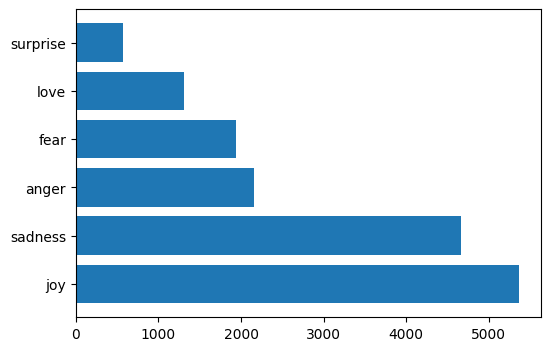

In [58]:
plt.figure(figsize=(6,4))
plt.barh(df["label_name"].value_counts().index,df["label_name"].value_counts())
plt.show()

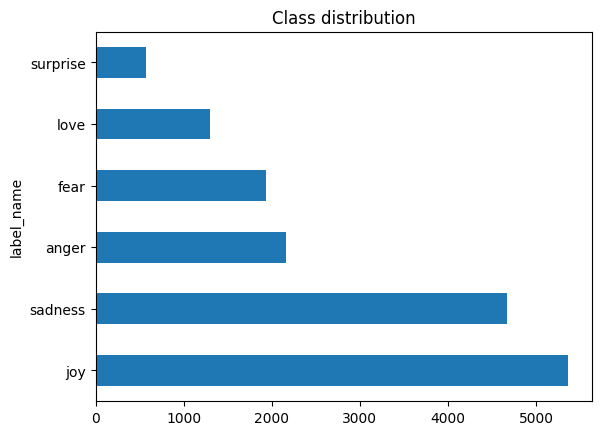

In [9]:
df["label_name"].value_counts().plot.barh()
plt.title('Class distribution')
plt.show()

### length of sentences

In [11]:
df['num_words']=df['text'].str.split().apply(len)

In [12]:
df.head()

,text,label,label_name,num_words
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


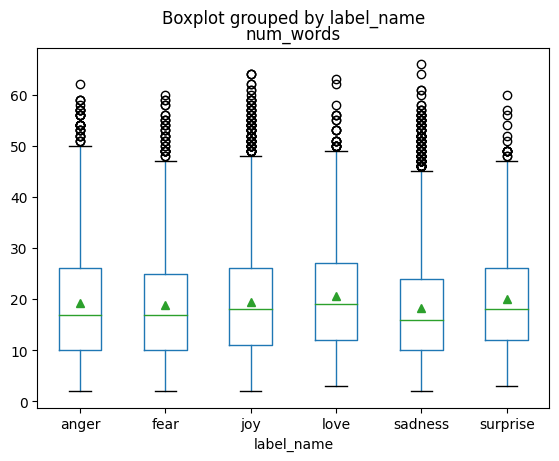

In [18]:
df.boxplot('num_words',by='label_name',grid=False,showmeans=True) # showfliers=False : outlier 제외,
plt.show()

In [20]:
import numpy as np

print('최대 길이 : {}'.format(np.max(df['num_words'])))
print('최소 길이 : {}'.format(np.min(df['num_words'])))
print('중간 길이 : {:.2f}'.format(np.median(df['num_words'])))
print('평균 길이 : {:.2f}'.format(np.mean(df['num_words'])))
print('3분위 길이 : {}'.format(np.percentile(df['num_words'],75)))
print('상위 99% 길이 : {}'.format(np.percentile(df['num_words'],99)))

최대 길이 : 66
최소 길이 : 2
중간 길이 : 17.00
평균 길이 : 19.17
3분위 길이 : 25.0
상위 99% 길이 : 52.0


## Tokenizing

In [23]:
from transformers import *

C:\Users\user\anaconda3\envs\nlp1\Lib\site-packages\transformers\generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(
C:\Users\user\anaconda3\envs\nlp1\Lib\site-packages\torchaudio\backend\utils.py:74: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


### load Tokenizer

In [34]:
# load tokenizer

# AutoTokenizer
model_ckpt='distilbert-base-uncased'
tokenizer=AutoTokenizer.from_pretrained(model_ckpt)

# load tokenizer manually
# tokenizer=DistilBertTokenizer.from_pretrained(model_ckpt)

loading configuration file config.json from cache at C:\Users\user/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.32.1",
  "vocab_size": 30522
}

loading file vocab.txt from cache at C:\Users\user/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\vocab.txt
loading file tokenizer.json from cache at C:\Users\user/.cache\huggingface\hub\models--distil

In [27]:
tokens=tokenizer('Tokenizing text is a core task in NLP')
tokens

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1999, 17953, 2361, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [28]:
tokenizer.convert_ids_to_tokens(tokens.input_ids)

['[CLS]',
 'token',
 '##izing',
 'text',
 'is',
 'a',
 'core',
 'task',
 'in',
 'nl',
 '##p',
 '[SEP]']

In [94]:
# 모델에 사용되는 input들!!
tokenizer.model_input_names

['input_ids', 'attention_mask']

### Tokenizing

In [51]:
# DatasetDict의 map() -> batch단위로 Tokenizer를 통한 결과를 매우 빠르게 가져올 수 있다.
# DatasetDict.map(tokenizer_function,batched=True,batch_size=None) ->  batch_size=None일 경우 전체 dataset이 하나의 batch가 됨, default=1000

def tokenize(example):
    return tokenizer(example['text'],padding=True,truncation=True) # padding=True : 배치에 있는 가장 긴 샘플 크기에 맞춰 샘플을 0으로 패딩, Truecation = True : 최대 문맥 크기에 맞춰 샘플 잘라냄

encoded_emotions=emotions.map(tokenize,batched=True,batch_size=None)

Map: 100%|██████████| 16000/16000 [00:00<00:00, 20395.45 examples/s]


In [52]:
encoded_emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [56]:
encoded_emotions['train'].features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None),
 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None),
 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None)}

## Modeling

### loading model

In [59]:
from transformers import AutoModel

In [60]:
model_ckpt='distilbert-base-uncased'
device='cuda' if torch.cuda.is_available() else 'cpu'
model=AutoModel.from_pretrained(model_ckpt).to(device)

loading configuration file config.json from cache at C:\Users\user/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\config.json
Model config DistilBertConfig {
  "_name_or_path": "distilbert-base-uncased",
  "activation": "gelu",
  "architectures": [
    "DistilBertForMaskedLM"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "initializer_range": 0.02,
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "transformers_version": "4.32.1",
  "vocab_size": 30522
}

loading weights file model.safetensors from cache at C:\Users\user/.cache\huggingface\hub\models--distilbert-base-uncased\snapshots\6cdc0aad91f5ae2e6712e91bc7b65d1cf5c05411\model.safetensors
Some weights of the model checkpoint at distilbert-base-uncased were 

In [62]:
model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

### extract last hidden state

In [71]:
input=tokenizer('i am a good boy',return_tensors='pt') # return_tensors='pt' 를 이용해 쉽게 Tensor 변환
input

{'input_ids': tensor([[ 101, 1045, 2572, 1037, 2204, 2879,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [75]:
inputs={k:v.to(device) for k,v in input.items()}

In [86]:
with torch.no_grad():
    outputs=model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.0550,  0.0253,  0.0240,  ...,  0.1079,  0.3065,  0.2685],
         [ 0.3348,  0.0794, -0.1201,  ..., -0.1493,  0.5007,  0.3036],
         [ 0.2704,  0.3186,  0.4424,  ..., -0.1496,  0.4481,  0.2210],
         ...,
         [ 0.7200,  0.4044,  0.6501,  ...,  0.1763,  0.2688, -0.5420],
         [-0.2075, -0.2077,  0.0033,  ...,  0.3623,  0.5159, -0.9063],
         [ 0.9345,  0.2613, -0.2959,  ...,  0.2264, -0.5064, -0.2942]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [87]:
# print(outputs[0].size())
print(outputs.last_hidden_state.size())

torch.Size([1, 7, 768])


In [91]:
# CLS last_hidden_state
print(outputs.last_hidden_state[:,0,:].size()) # print(outputs.last_hidden_state[:,0].size())

torch.Size([1, 768])


In [ ]:
def hidden_states(sample):
    inputs={k:v.to(device) for k,v in sample.items() if k in tokenizer.model_input_names}
    
    with torch.no_grad():
        outputs=model(**inputs).last_hidden_state
    
    return {hidden_state}